In [2]:
import random
import math
import cmath
import numpy as np
import sympy as sp
from sympy.vector import Del
from sympy import I as J
import scipy.stats as stats
from scipy.special import perm, comb, factorial
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import control as ct
sp.init_printing()

In [3]:
data_file = "walking_path_1.csv"

In [10]:
# load CSV into dataframe
df = pd.read_csv(data_file)

# filter dataframe by type
ios_df = df[ df['type'] == 'ios' ]
anchor_df = df[ df['type'] == 'anchor' ]

# sort dataframes by timestamp
ios_df = ios_df.sort_values(by=['timestamp'])
anchor_df = anchor_df.sort_values(by=['timestamp'])

display(ios_df)
display(anchor_df)

,type,aid,timestamp,status,distance_m,azimuth_deg,elevation_deg,los
10,ios,0,9.728,NaN,5.106965,0.0,141.0,0.0
14,ios,0,9.900,NaN,5.200693,0.0,141.0,0.0
17,ios,0,10.051,NaN,5.222562,0.0,141.0,0.0
20,ios,3,10.187,NaN,3.804666,0.0,141.0,0.0
22,ios,0,10.211,NaN,5.248894,0.0,141.0,0.0
...,...,...,...,...,...,...,...,...
1040,ios,0,36.042,NaN,4.453310,80.0,140.0,0.0
1041,ios,1,36.050,NaN,2.701932,74.0,64.0,0.0
1044,ios,3,36.127,NaN,3.504274,-29.0,113.0,1.0
1047,ios,1,36.243,NaN,2.695903,74.0,64.0,0.0


,type,aid,timestamp,status,distance_m,azimuth_deg,elevation_deg,los
0,anchor,2,0.011,2.0,0.0,NaN,NaN,NaN
1,anchor,3,0.011,2.0,0.0,NaN,NaN,NaN
2,anchor,0,0.011,2.0,0.0,NaN,NaN,NaN
3,anchor,1,0.011,2.0,0.0,NaN,NaN,NaN
4,anchor,0,9.387,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1066,anchor,3,37.011,2.0,0.0,NaN,NaN,NaN
1067,anchor,1,37.019,2.0,0.0,NaN,NaN,NaN
1068,anchor,0,37.108,2.0,0.0,NaN,NaN,NaN
1069,anchor,3,37.254,2.0,0.0,NaN,NaN,NaN


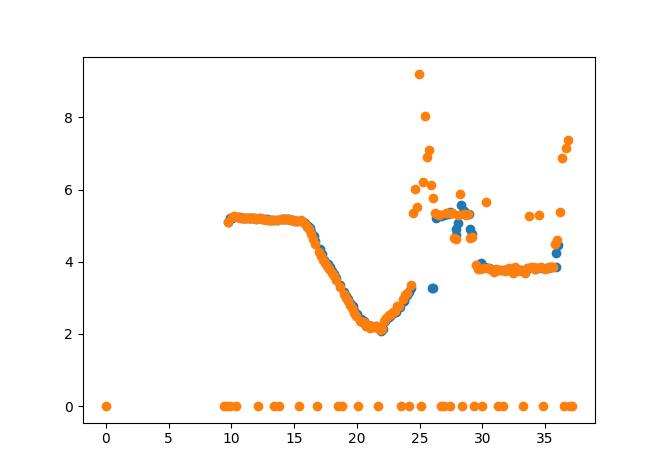

In [23]:
%matplotlib widget

# compare ios vs anchor distance readings for each anchor

a0_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 0]['distance_m'] )
a0_ios_time     = np.array( ios_df.loc[ios_df['aid'] == 0]['timestamp'] )

a1_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 1]['distance_m'] )
a1_ios_time     = np.array( ios_df.loc[ios_df['aid'] == 1]['timestamp'] )

a2_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 2]['distance_m'] )
a2_ios_time     = np.array( ios_df.loc[ios_df['aid'] == 2]['timestamp'] )

a3_ios_distance = np.array( ios_df.loc[ios_df['aid'] == 3]['distance_m'] )
a3_ios_time     = np.array( ios_df.loc[ios_df['aid'] == 3]['timestamp'] )

a0_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 0]['distance_m'] )
a0_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 0]['timestamp'] )

# status != 0 means an error, get the timestamps where there is an error
a0_anchor_status = np.array( anchor_df.loc[anchor_df['aid'] == 0]['status'] )

a1_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 1]['distance_m'] )
a1_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 1]['timestamp'] )

a2_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 2]['distance_m'] )
a2_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 2]['timestamp'] )

a3_anchor_distance = np.array( anchor_df.loc[anchor_df['aid'] == 3]['distance_m'] )
a3_anchor_time     = np.array( anchor_df.loc[anchor_df['aid'] == 3]['timestamp'] )

# clear the current plot
plt.clf()

# plot ios data
plt.plot(a0_ios_time, a0_ios_distance, label='a0_ios')
# plt.plot(a1_ios_time, a1_ios_distance, label='a1_ios')
# plt.plot(a2_ios_time, a2_ios_distance, label='a2_ios')
# plt.plot(a3_ios_time, a3_ios_distance, label='a3_ios')

# plot anchor data
plt.plot(a0_anchor_time, a0_anchor_distance, label='a0_anchor')
# plt.plot(a1_anchor_time, a1_anchor_distance, label='a1_anchor')
# plt.plot(a2_anchor_time, a2_anchor_distance, label='a2_anchor')
# plt.plot(a3_anchor_time, a3_anchor_distance, label='a3_anchor')



plt.show()